In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.preprocessing import load_data, complete_preprocessing
from tueplots import bundles

/var/folders/ct/c6nl4fhx7hx43w75240zn_140000gn/T/ipykernel_31008/4159987117.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


/Users/manuelarns/Developer/Data-Litaracy-Project/exp/src/preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


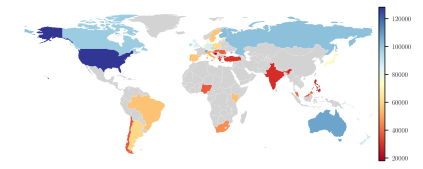

In [2]:
# load world and salaries data
salaries = complete_preprocessing()
world_data, _, _ = load_data()

# calculate mean average salary for all countries
salaries_count_per_country = salaries[['company_location_iso_a3', 'salary_in_usd']].groupby('company_location_iso_a3').count()
avg_salaries_by_country = salaries[['company_location_iso_a3', 'salary_in_usd']].groupby('company_location_iso_a3').mean()
avg_salaries_by_country = pd.merge(avg_salaries_by_country, salaries_count_per_country, left_index=True, right_index=True, how='left')

# filter out values with less than N datapoints
avg_salaries_by_country = avg_salaries_by_country[avg_salaries_by_country['salary_in_usd_y'] >= 3]

# merge with world map data
world = world_data[world_data.name!="Antarctica"]
world_salaries = pd.merge(world, avg_salaries_by_country, left_on='iso_a3', right_index=True, how='left')

# plot
with plt.rc_context(bundles.neurips2021(family='serif')):

    fig, ax = plt.subplots()
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    axis = divider.append_axes("right", size="1.5%", pad=-.25)
    world_salaries.plot(ax=ax,
                        column='salary_in_usd_x',
                        cmap='RdYlBu',
                        missing_kwds={'color': 'lightgrey'},
                        legend=True,
                        cax=axis,
                        vmin=world_salaries['salary_in_usd_x'].min(),
                        vmax=world_salaries['salary_in_usd_x'].max(),
                        linewidth=1)

    plt.savefig('../doc/fig/choropleth.pdf', bbox_inches='tight')